In [1]:
import pandas as pd

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
df = pd.read_json('wish_queries_with_timestamp.json', lines=True)

In [3]:
df['min_timestamp_datetime'] = pd.to_datetime(df['min_timestamp'], unit='s')

In [4]:
df.set_index('min_timestamp_datetime', inplace=True)

In [5]:
df = df.sort_index()

In [6]:
df

,query,min_timestamp,max_timestamp,min_dt,max_dt,cnt,gmv
min_timestamp_datetime,,,,,,,
2019-12-31 08:00:00,posters elefantes,1577779200,1655259026,2020-01-01,2022-06-15,145,0.000000e+00
2019-12-31 08:00:00,ben 10 toys,1577779200,1669795184,2020-01-01,2022-11-30,26952,2.796466e+03
2019-12-31 08:00:00,cover iphone 11 pro max,1577779200,1669794442,2020-01-01,2022-11-30,222735,1.558650e+04
2019-12-31 08:00:00,king and queen,1577779200,1669794566,2020-01-01,2022-11-30,717750,1.311209e+05
2019-12-31 08:00:00,electric bike,1577779200,1669795158,2020-01-01,2022-11-30,4111706,1.056199e+06
...,...,...,...,...,...,...,...
2022-11-30 07:59:56,moxa cone needld,1669795196,1669795196,2022-11-30,2022-11-30,1,0.000000e+00
2022-11-30 07:59:57,scheerapparaat heren mesjes philips 1000,1669795197,1669795198,2022-11-30,2022-11-30,2,0.000000e+00
2022-11-30 07:59:58,golden diamond krone handyhülle,1669795198,1669795198,2022-11-30,2022-11-30,1,0.000000e+00


In [7]:
from dateutil.relativedelta import relativedelta
import numpy as np

In [8]:
df_roll_s_count = df.rolling(window='1S')['query'].count()

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot: xlabel='min_timestamp_datetime'>

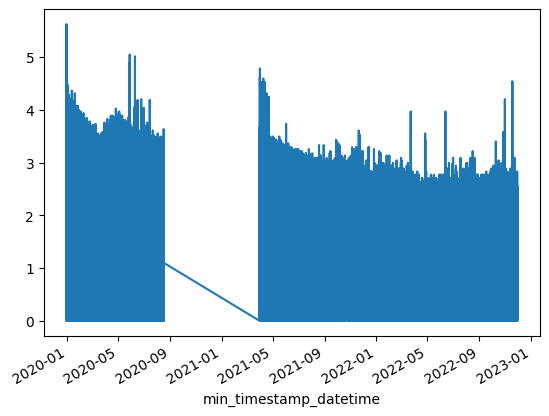

In [9]:
df_roll_s_count.apply(lambda x: np.log(x)).plot()

In [15]:
np.exp(6), np.exp(3)

(403.4287934927351, 20.085536923187668)

In [14]:
403 / (1/0.14) * .316 * 9000

160458.48

In [16]:
20 / (1/0.14) * .316 * 9000

7963.200000000002

In [18]:
df_roll_s_count.mean(), df_roll_s_count.median()

7.1596399716499715

In [19]:
1 / .14

7.142857142857142

In [20]:
df_roll_s_count_gmvnonzero = df[df.gmv > 0].rolling(window='1S')['query'].count()
df_roll_s_count_cntgt100 = df[df.cnt > 100].rolling(window='1S')['query'].count()